<a href="https://colab.research.google.com/github/rositata/Rositadwfitria-Car_Price/blob/main/Rositadwfitria_Car_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas

In [ ]:
!pip install seaborn

In [ ]:
# Import Library yang dibutuhkan
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import seaborn as sns

Import Data

In [ ]:
data = pd.read_csv('/content/car_price_dataset.csv')
print(data)

           Brand     Model  Year  Engine_Size Fuel_Type    Transmission  \
0            Kia       Rio  2020          4.2    Diesel          Manual   
1      Chevrolet    Malibu  2012          2.0    Hybrid       Automatic   
2       Mercedes       GLA  2020          4.2    Diesel       Automatic   
3           Audi        Q5  2023          2.0  Electric          Manual   
4     Volkswagen      Golf  2003          2.6    Hybrid  Semi-Automatic   
...          ...       ...   ...          ...       ...             ...   
9995         Kia    Optima  2004          3.7    Diesel  Semi-Automatic   
9996   Chevrolet    Impala  2002          1.4  Electric       Automatic   
9997         BMW  3 Series  2010          3.0    Petrol       Automatic   
9998        Ford  Explorer  2002          1.4    Hybrid       Automatic   
9999  Volkswagen    Tiguan  2001          2.1    Diesel          Manual   

      Mileage  Doors  Owner_Count  Price  
0      289944      3            5   8501  
1        5356

In [ ]:
# 7 Data Teratas
print(data.head(7))

        Brand   Model  Year  Engine_Size Fuel_Type    Transmission  Mileage  \
0         Kia     Rio  2020          4.2    Diesel          Manual   289944   
1   Chevrolet  Malibu  2012          2.0    Hybrid       Automatic     5356   
2    Mercedes     GLA  2020          4.2    Diesel       Automatic   231440   
3        Audi      Q5  2023          2.0  Electric          Manual   160971   
4  Volkswagen    Golf  2003          2.6    Hybrid  Semi-Automatic   286618   
5      Toyota   Camry  2007          2.7    Petrol       Automatic   157889   
6       Honda   Civic  2010          3.4  Electric       Automatic   139584   

   Doors  Owner_Count  Price  
0      3            5   8501  
1      2            3  12092  
2      4            2  11171  
3      2            1  11780  
4      3            3   2867  
5      4            4   7242  
6      3            1  11208  


In [ ]:
data.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


Analisis Dataset

In [ ]:
#5 Top brands berdasarkan quantity
top_5_brands = data['Brand'].value_counts().head(5)
top_5_brands

,count
Brand,
Ford,1048
Audi,1038
Volkswagen,1020
Honda,1009
Chevrolet,1003


In [ ]:
#5 Top brand di tahun 2023
filtered_data_2023 = data[(data['Year'] == 2023) & (data['Brand'].isin(top_5_brands.index))]
filtered_data_2023.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
44,Audi,Q5,2023,3.6,Electric,Manual,238306,5,2,11833
79,Volkswagen,Golf,2023,3.5,Petrol,Semi-Automatic,139477,2,5,11710
146,Ford,Explorer,2023,4.1,Electric,Automatic,67072,4,3,17258
234,Audi,Q5,2023,4.7,Electric,Automatic,222000,3,3,14760


In [ ]:
brand_counts_2023 = filtered_data_2023['Brand'].value_counts()

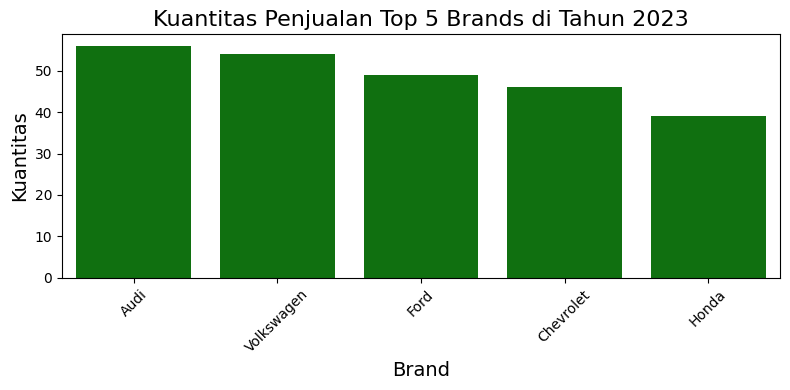

In [96]:
plt.figure(figsize=(8, 4))
sns.barplot(
    x=brand_counts_2023.index,
    y=brand_counts_2023.values,
    color='green')
plt.title('Kuantitas Penjualan Top 5 Brands di Tahun 2023', fontsize=16)
plt.xlabel('Brand', fontsize=14)
plt.ylabel('Kuantitas', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

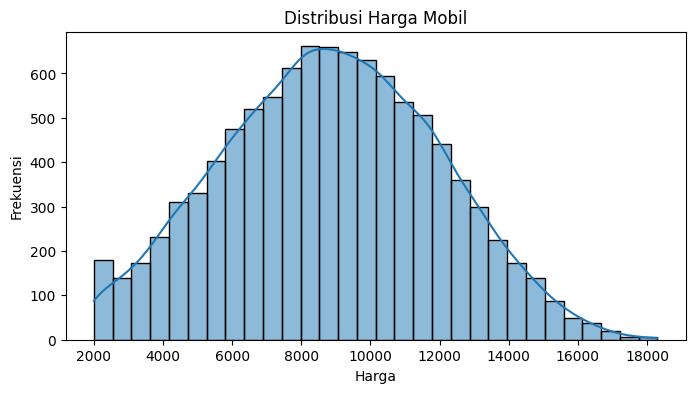

In [ ]:
# Visualisasi Distribusi Harga
plt.figure(figsize=(8, 4))
sns.histplot(data['Price'], bins=30, kde=True)
plt.title('Distribusi Harga Mobil')
plt.xlabel('Harga')
plt.ylabel('Frekuensi')
plt.show()

In [ ]:
# Menampilkan 5 mobil dengan harga tertinggi
print("Mobil dengan Harga Tertinggi:\n", data.sort_values(by='Price', ascending=False).head())
print(data.head())

Mobil dengan Harga Tertinggi:
        Brand     Model  Year  Engine_Size Fuel_Type Transmission  Mileage  \
1100  Toyota   Corolla  2021          4.7  Electric    Automatic    14924   
7221    Audi        A3  2023          5.0    Hybrid    Automatic    12234   
1012    Ford  Explorer  2020          4.8  Electric    Automatic    19112   
9564   Honda    Accord  2022          4.0  Electric    Automatic    14658   
5698   Honda      CR-V  2023          4.6    Hybrid    Automatic    10046   

      Doors  Owner_Count  Price  
1100      5            3  18301  
7221      5            5  18255  
1012      4            5  18017  
9564      4            2  17906  
5698      4            4  17899  
        Brand   Model  Year  Engine_Size Fuel_Type    Transmission  Mileage  \
0         Kia     Rio  2020          4.2    Diesel          Manual   289944   
1   Chevrolet  Malibu  2012          2.0    Hybrid       Automatic     5356   
2    Mercedes     GLA  2020          4.2    Diesel       Automati

In [ ]:
# Rata-rata fitur berdasarkan kategori harga
median_price = data['Price'].median()
high_price = data[data['Price'] > median_price]
low_price = data[data['Price'] <= median_price]

print("\nRata-rata Fitur Mobil dengan Harga Tinggi:\n", high_price.describe())
print("\nRata-rata Fitur Mobil dengan Harga Rendah:\n", low_price.describe())



Rata-rata Fitur Mobil dengan Harga Tinggi:
               Year  Engine_Size        Mileage        Doors  Owner_Count  \
count  5000.000000  5000.000000    5000.000000  5000.000000  5000.000000   
mean   2015.377800     3.323640  110892.456400     3.510200     2.975800   
std       5.742792     1.099487   77400.588925     1.114336     1.427593   
min    2000.000000     1.000000      25.000000     2.000000     1.000000   
25%    2011.000000     2.500000   45286.750000     3.000000     2.000000   
50%    2016.000000     3.500000   98167.500000     4.000000     3.000000   
75%    2020.000000     4.300000  166325.750000     5.000000     4.000000   
max    2023.000000     5.000000  299471.000000     5.000000     5.000000   

             Price  
count   5000.00000  
mean   11389.93800  
std     1811.97858  
min     8859.00000  
25%     9922.75000  
50%    11087.00000  
75%    12544.25000  
max    18301.00000  

Rata-rata Fitur Mobil dengan Harga Rendah:
               Year  Engine_Size     

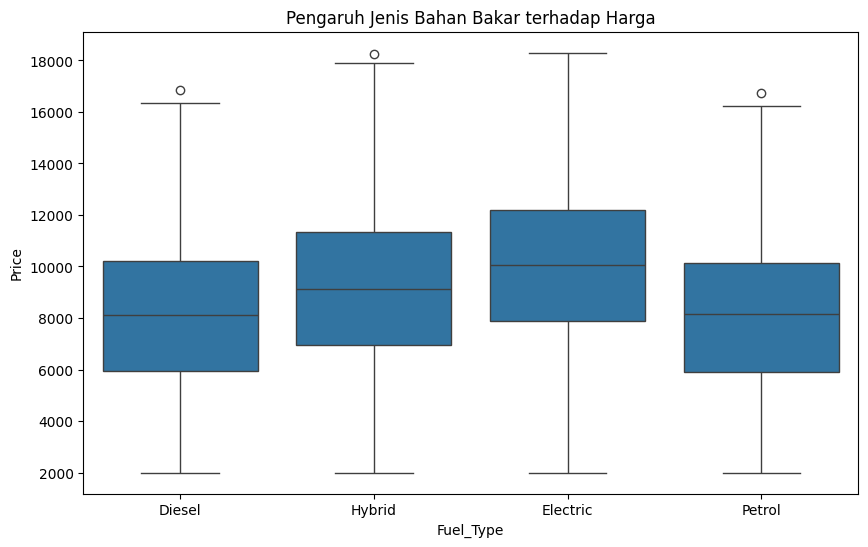

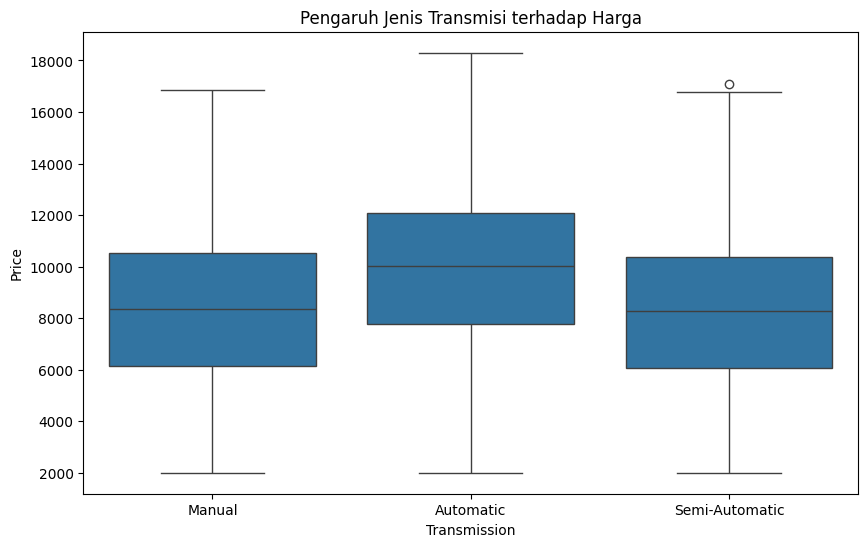

In [ ]:
# Visualisasi hubungan fitur utama dengan harga
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fuel_Type', y='Price', data=data)
plt.title('Pengaruh Jenis Bahan Bakar terhadap Harga')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Transmission', y='Price', data=data)
plt.title('Pengaruh Jenis Transmisi terhadap Harga')
plt.show()


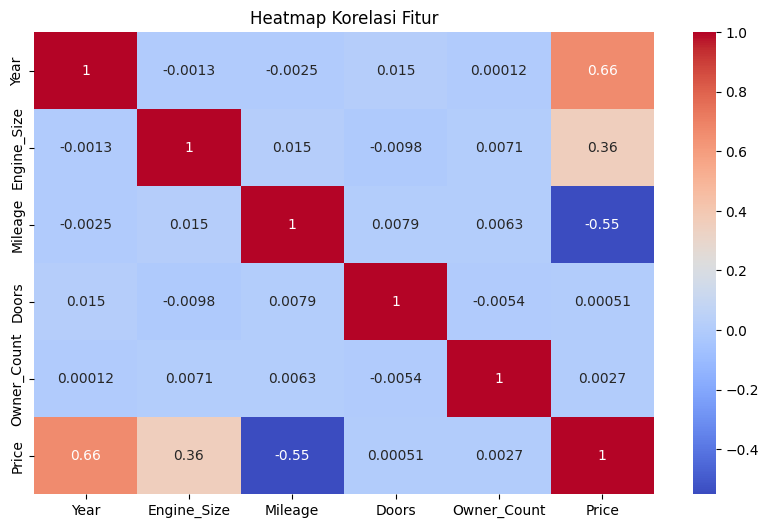

In [ ]:
# Analisis korelasi
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi Fitur')
plt.show()